# Aquatrax EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## read data
from google.colab import drive
drive.mount('/content/gdrive')

degraded = pd.read_csv('gdrive/My Drive/Degraded Meters-Sample data-100 accounts time series historical.csv')
non_degraded = pd.read_csv('gdrive/My Drive/non-degraded meters account sample-100 accounts-duke.csv')

Mounted at /content/gdrive


In [ ]:
non_degraded["Usagedate"] = pd.to_datetime(non_degraded["Usagedate"], format='%m/%d/%Y %H:%M')
non_degraded = non_degraded.loc[non_degraded["Value"] >= 0]

non_degraded

,AccountNumber,Usagedate,Value,Meternumber
0,4650540-116866,2023-02-13 16:00:00,0.0,4650540-10450-1
1,4650540-116866,2023-02-13 17:00:00,0.0,4650540-10450-1
2,4650540-116866,2023-02-13 18:00:00,9.0,4650540-10450-1
3,4650540-116866,2023-02-13 19:00:00,2.0,4650540-10450-1
4,4650540-116866,2023-02-13 20:00:00,5.0,4650540-10450-1
...,...,...,...,...
610396,5600600-161935,2023-09-04 19:00:00,9.0,5600600-10450-1
610397,5600600-161935,2023-09-04 20:00:00,8.0,5600600-10450-1
610398,5600600-161935,2023-09-04 21:00:00,9.0,5600600-10450-1
610399,5600600-161935,2023-09-04 22:00:00,8.0,5600600-10450-1


In [ ]:
degraded["Usagedate"] = pd.to_datetime(degraded["Usagedate"], format='%m/%d/%Y %H:%M')

degraded

,AccountNumber,Usagedate,Value,Meternumber
0,0101240-651479,2023-04-19 00:00:00,0,0101240-10450-1
1,0101240-651479,2023-04-19 01:00:00,0,0101240-10450-1
2,0101240-651479,2023-04-19 02:00:00,0,0101240-10450-1
3,0101240-651479,2023-04-19 03:00:00,0,0101240-10450-1
4,0101240-651479,2023-04-19 04:00:00,0,0101240-10450-1
...,...,...,...,...
391673,5650360-19177,2023-05-31 19:00:00,0,5650360-10450-1
391674,5650360-19177,2023-05-31 20:00:00,0,5650360-10450-1
391675,5650360-19177,2023-05-31 21:00:00,0,5650360-10450-1
391676,5650360-19177,2023-05-31 22:00:00,0,5650360-10450-1


## Degraded EDA

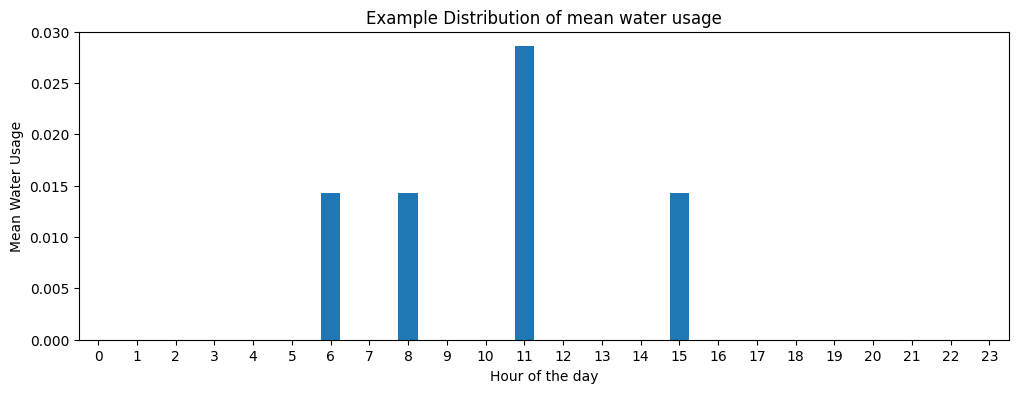

In [ ]:
degraded_ex = degraded[degraded["Meternumber"] == "0101240-10450-1"]

fig, axs = plt.subplots(figsize=(12, 4))

degraded_ex.groupby(degraded_ex["Usagedate"].dt.hour)["Value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Hour of the day");
plt.ylabel("Mean Water Usage");
plt.title("Example Distribution of mean water usage");

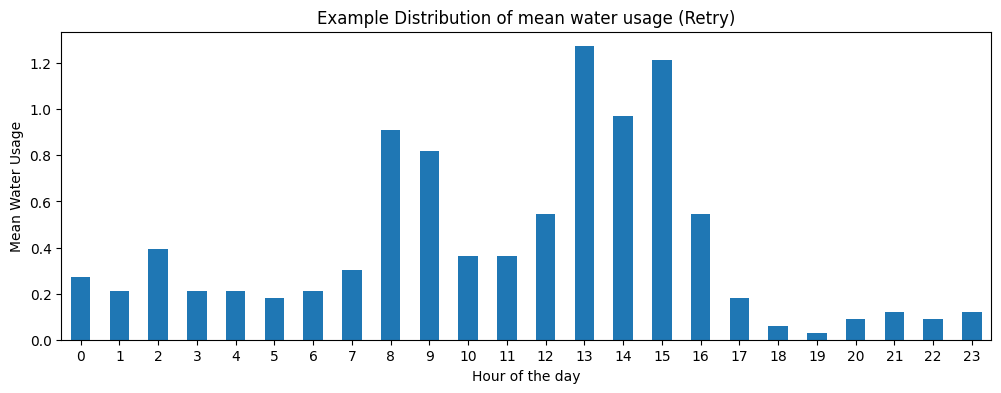

In [ ]:
degraded_ex2 = degraded[degraded["Meternumber"] == "0100620-10450-1"]

fig, axs = plt.subplots(figsize=(12, 4))

degraded_ex2.groupby(degraded_ex2["Usagedate"].dt.hour)["Value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Hour of the day");
plt.ylabel("Mean Water Usage");
plt.title("Example Distribution of mean water usage (Retry)");

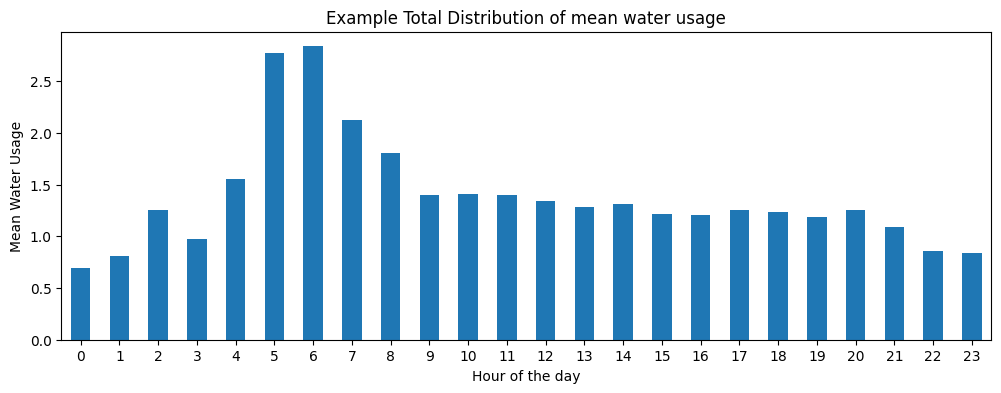

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))

degraded.groupby(degraded["Usagedate"].dt.hour)["Value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Hour of the day");
plt.ylabel("Mean Water Usage");
plt.title("Example Total Distribution of mean water usage");

In [ ]:
degraded["Usagedate"] = pd.to_datetime(degraded["Usagedate"], format='%m/%d/%Y %H:%M')

no_2 = degraded.pivot_table(index="Usagedate", columns="Meternumber", values="Value", aggfunc='mean')

no_2

Meternumber,0100620-10450-1,0101240-10450-1,0103960-10450-1,0251240-10450-1,0254640-10450-1,0300500-10450-1,0350260-10450-1,0350620-10450-1,0350660-10450-1,0403620-10450-1,...,5201600-10450-1,5304620-10450-1,5351770-10450-1,5501100-10450-1,5503520-10450-1,5602160-10450-1,5650360-10450-1,5651620-10450-1,5700760-10450-1,5851880-10450-1
Usagedate,,,,,,,,,,,,,,,,,,,,,
2022-08-01 00:00:00,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0
2022-08-01 01:00:00,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0
2022-08-01 02:00:00,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5.0,0.0
2022-08-01 03:00:00,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0
2022-08-01 04:00:00,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-04 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-04 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-04 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Usagedate'>

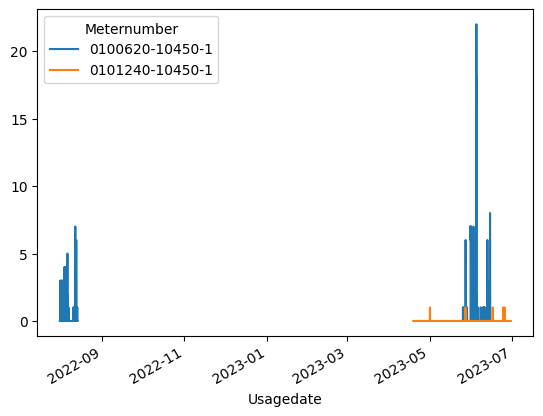

In [ ]:
no_2.plot(y = ['0100620-10450-1', '0101240-10450-1'])

## Non-degraded EDA

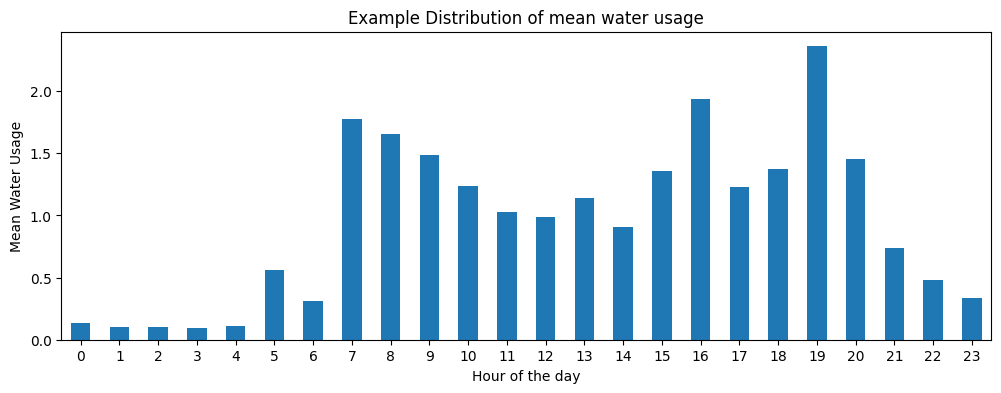

In [ ]:
non_degraded_ex = non_degraded[non_degraded["Meternumber"] == "4650540-10450-1"]

fig, axs = plt.subplots(figsize=(12, 4))

non_degraded_ex.groupby(non_degraded_ex["Usagedate"].dt.hour)["Value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Hour of the day");
plt.ylabel("Mean Water Usage");
plt.title("Example Distribution of mean water usage");

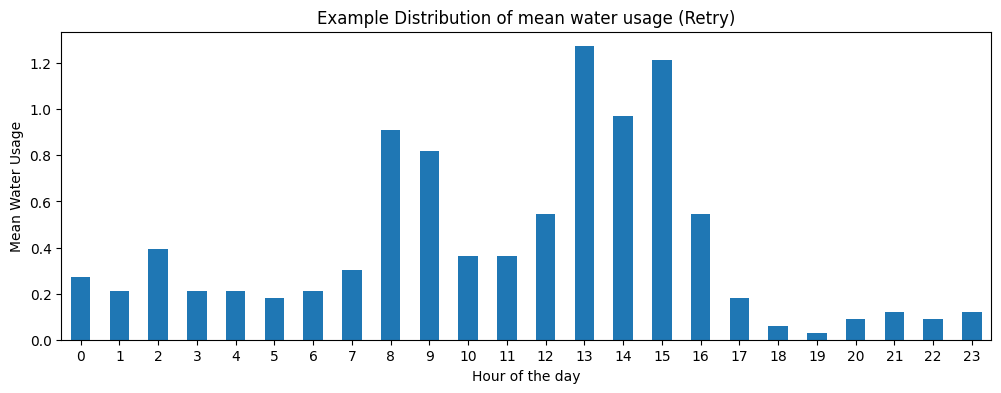

In [ ]:
degraded_ex2 = degraded[degraded["Meternumber"] == "0100620-10450-1"]

fig, axs = plt.subplots(figsize=(12, 4))

degraded_ex2.groupby(degraded_ex2["Usagedate"].dt.hour)["Value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Hour of the day");
plt.ylabel("Mean Water Usage");
plt.title("Example Distribution of mean water usage (Retry)");

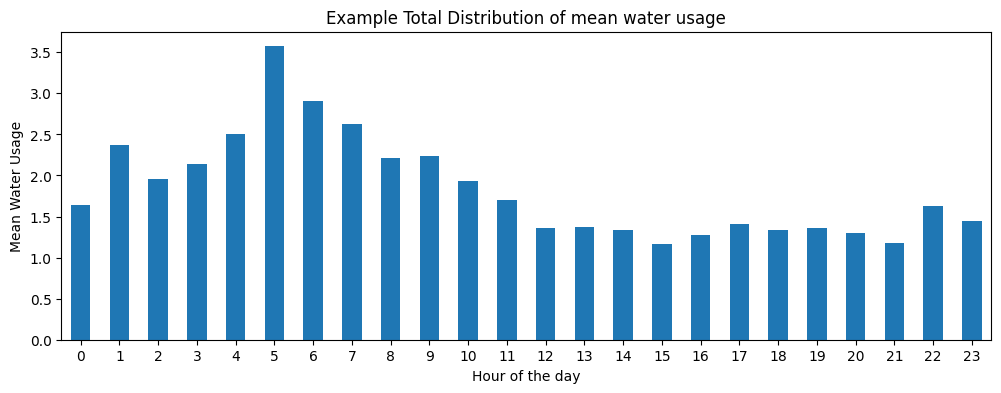

In [ ]:
non_degraded = non_degraded.loc[non_degraded["Value"] >= 0]

fig, axs = plt.subplots(figsize=(12, 4))

non_degraded.groupby(non_degraded["Usagedate"].dt.hour)["Value"].mean().plot(
    kind='bar', rot=0, ax=axs
)

plt.xlabel("Hour of the day");
plt.ylabel("Mean Water Usage");
plt.title("Example Total Distribution of mean water usage");

## Analysis

### Individual Comparison

Both are bimodal with peaks at about 7am and 7pm (which makes sense). General distributions are very similar, but degraded meters have a lower mean in general (depressed by a constant factor across all hours).

### Collective Comparison

Both are unimodal with peaks at 5am (which doesn't really make sense). Again, distributions are very similar, but degraded meters have a lower mean on average (about 1.5 for degraded; 2 for non-degraded)

## Potential Directions

Variables: mean of water usage by hour (that's 24 variables) & overall mean water usage per day

Algorithm: CART (can potentially to be very accurate, but might overfit), Detection using Forecasting (nicely handles seasonal data), K-means clustering (may be computationally heavy)

# Meeting 2

In [ ]:
degraded = degraded.dropna(axis='rows')
non_degraded = non_degraded.dropna(axis = 'rows')

In [ ]:
def drawDist(df, months):
  fig, axs = plt.subplots(3,4)

  for mon in months:
    col = (mon - 1) % 4
    row = (mon - 1) % 3

    ex = df.loc[df["Usagedate"].dt.month == mon]

    axs[row,col].plot(ex.groupby(ex["Usagedate"].dt.hour)["Value"].mean())

    for ax in axs.flat:
        ax.set(xlabel='Hour of the day', ylabel='Mean Water Usage')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()


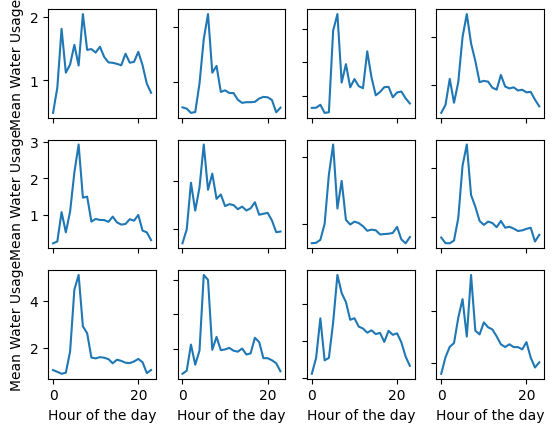

In [ ]:
drawDist(degraded, list(range(1,13)))

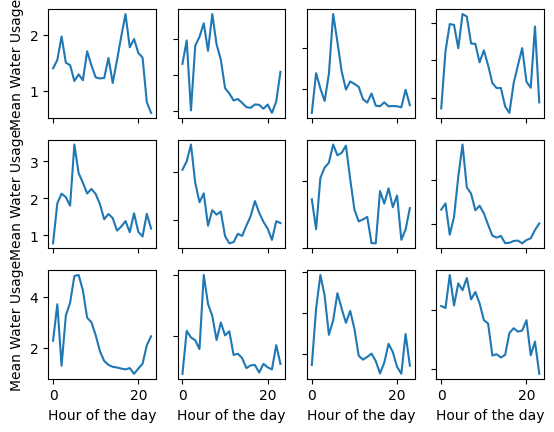

In [ ]:
drawDist(non_degraded, list(range(1,13)))

Interesting observation: water usage look pretty symmetric across the year

Features: median and IQR of mean water usage per day for each month (24 features)

In [ ]:
degraded.loc[degraded["Usagedate"].dt.month == 1]

#axs[row,col].plot(ex.groupby(ex["Usagedate"].dt.hour)["Value"].mean())

,AccountNumber,Usagedate,Value,Meternumber,Degraded
9753,3021810-572886,2023-01-01 00:00:00,0,3021810-10450-1,1
9754,3021810-572886,2023-01-01 01:00:00,0,3021810-10450-1,1
9755,3021810-572886,2023-01-01 02:00:00,0,3021810-10450-1,1
9756,3021810-572886,2023-01-01 03:00:00,0,3021810-10450-1,1
9757,3021810-572886,2023-01-01 04:00:00,0,3021810-10450-1,1
...,...,...,...,...,...
389511,0350260-670332,2023-01-31 19:00:00,0,0350260-10450-1,1
389512,0350260-670332,2023-01-31 20:00:00,0,0350260-10450-1,1
389513,0350260-670332,2023-01-31 21:00:00,0,0350260-10450-1,1
389514,0350260-670332,2023-01-31 22:00:00,0,0350260-10450-1,1


In [ ]:
degraded_data = {
    "Meternumber": [],
    "Jan_median": [],
    "Jan_IQR": [],
    "Feb_median": [],
    "Feb_IQR": [],
    "Mar_median": [],
    "Mar_IQR": [],
    "Apr_median": [],
    "Apr_IQR": [],
    "May_median": [],
    "May_IQR": [],
    "Jun_median": [],
    "Jun_IQR": [],
    "Jul_median": [],
    "Jul_IQR": [],
    "Aug_median": [],
    "Aug_IQR": [],
    "Sep_median": [],
    "Sep_IQR": [],
    "Oct_median": [],
    "Oct_IQR": [],
    "Nov_median": [],
    "Nov_IQR": [],
    "Dec_median": [],
    "Dec_IQR": []
}

titles = list(degraded_data.keys())
titles.pop(0)
index = 0

for meter in (degraded.Meternumber.unique()):
  degraded_data['Meternumber'].append(meter)
  temp = degraded.loc[degraded["Meternumber"] == meter]
  for mon in range(1,13):
    by_month = temp.loc[temp["Usagedate"].dt.month == mon]
    mean = by_month.groupby(by_month["Usagedate"].dt.hour)["Value"].mean().mean()
    #print(mean)
    degraded_data[titles[index]].append(mean)
    index += 1
    degraded_data[titles[index]].append(by_month.groupby(by_month["Usagedate"].dt.hour)["Value"].std().mean())
    index += 1
  index = 0

#degraded_data
degraded_data = pd.DataFrame(degraded_data).dropna('rows')
#degraded_data

<ipython-input-29-6f64835c2f93>:47: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  degraded_data = pd.DataFrame(degraded_data).dropna('rows')


In [ ]:
nondegraded_data = {
    "Meternumber": [],
    "Jan_median": [],
    "Jan_IQR": [],
    "Feb_median": [],
    "Feb_IQR": [],
    "Mar_median": [],
    "Mar_IQR": [],
    "Apr_median": [],
    "Apr_IQR": [],
    "May_median": [],
    "May_IQR": [],
    "Jun_median": [],
    "Jun_IQR": [],
    "Jul_median": [],
    "Jul_IQR": [],
    "Aug_median": [],
    "Aug_IQR": [],
    "Sep_median": [],
    "Sep_IQR": [],
    "Oct_median": [],
    "Oct_IQR": [],
    "Nov_median": [],
    "Nov_IQR": [],
    "Dec_median": [],
    "Dec_IQR": []
}

titles = list(nondegraded_data.keys())
titles.pop(0)
index = 0

for meter in (non_degraded.Meternumber.unique()):
  nondegraded_data['Meternumber'].append(meter)
  temp = non_degraded.loc[non_degraded["Meternumber"] == meter]
  for mon in range(1,13):
    by_month = temp.loc[temp["Usagedate"].dt.month == mon]
    mean = by_month.groupby(by_month["Usagedate"].dt.hour)["Value"].mean().mean()
    #print(mean)
    nondegraded_data[titles[index]].append(mean)
    index += 1
    nondegraded_data[titles[index]].append(by_month.groupby(by_month["Usagedate"].dt.hour)["Value"].std().mean())
    index += 1
  index = 0

#degraded_data
nondegraded_data = pd.DataFrame(nondegraded_data).dropna('rows')
nondegraded_data

<ipython-input-30-4916146610cc>:47: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  nondegraded_data = pd.DataFrame(nondegraded_data).dropna('rows')


,Meternumber,Jan_median,Jan_IQR,Feb_median,Feb_IQR,Mar_median,Mar_IQR,Apr_median,Apr_IQR,May_median,...,Aug_median,Aug_IQR,Sep_median,Sep_IQR,Oct_median,Oct_IQR,Nov_median,Nov_IQR,Dec_median,Dec_IQR
3,4602960-10450-1,0.901389,1.236848,6.062500,5.817068,1.287393,1.202530,7.587644,8.859269,12.858333,...,11.921784,3.845967,8.001344,6.069800,2.968056,4.653562,10.581694,2.831363,11.159946,23.363217
4,5200100-10450-1,12.479167,12.670191,13.055060,13.673166,12.109954,14.233358,13.320402,13.810591,15.066667,...,14.245536,15.326279,15.588542,15.076832,13.693056,11.059210,10.687539,12.756302,14.255556,13.628761
5,3822530-10450-1,0.693056,1.465987,1.520833,3.728055,0.435069,0.924916,0.666667,1.705000,1.081897,...,0.703788,1.937447,1.092742,2.183597,1.183333,2.275547,1.041772,1.913109,0.850000,1.527225
6,4603140-10450-1,0.450000,2.052422,25.873512,18.093880,0.313272,0.627967,0.318966,0.405759,0.359722,...,2.465643,3.120602,2.571615,2.935968,2.072222,2.246486,1.623372,1.998477,0.720833,1.493049
7,4202220-10450-1,3.198611,3.837557,2.940476,3.814474,2.521860,4.341564,2.000000,3.085957,2.788889,...,2.953869,3.346790,3.582079,3.950700,3.066667,3.744672,2.303254,3.965170,2.769444,3.660674
9,0300520-10450-1,0.851389,1.454500,0.279762,0.689100,0.143756,0.439846,0.232143,0.552366,0.355556,...,0.503125,1.228054,0.822917,1.497315,0.817683,1.027363,0.804502,1.342827,0.866667,1.350142
10,3820130-10450-1,2.490278,2.787783,2.313988,2.418246,0.980710,1.506809,2.067529,2.513314,2.733333,...,3.139660,4.242603,3.412990,4.331563,2.763889,2.587303,2.809884,3.486807,2.366379,2.933671
13,3751140-10450-1,0.387500,0.646452,0.523810,0.668737,0.620792,0.843101,0.465517,0.615658,0.405556,...,0.419643,0.614324,0.223039,0.467949,0.187500,0.377636,0.209722,0.794423,0.494624,0.711769
15,3650180-10450-1,1.150000,1.864440,1.145833,1.912164,0.985229,1.992809,1.057471,1.951152,0.930556,...,1.124256,2.388414,1.003906,1.852893,1.223611,2.236502,1.122878,1.950542,0.952778,1.784374
17,3500170-10450-1,0.275000,0.743932,0.818452,1.560100,1.021605,1.812356,2.066092,1.918107,1.776389,...,2.368983,2.330505,2.912760,2.630695,1.294444,1.919408,1.037500,2.160582,0.897222,1.049577


In [ ]:
# add labels to each df
degraded_lab = [1 for i in range(len(degraded_data))]
nondegraded_lab = [0 for i in range(len(nondegraded_data))]

degraded_data['Degraded'] = degraded_lab
nondegraded_data["Degraded"] = nondegraded_lab

In [ ]:
# concatenate two df's
data = pd.concat([degraded_data, nondegraded_data])
data = data.drop(columns = ['Meternumber'])
data

,Jan_median,Jan_IQR,Feb_median,Feb_IQR,Mar_median,Mar_IQR,Apr_median,Apr_IQR,May_median,May_IQR,...,Aug_IQR,Sep_median,Sep_IQR,Oct_median,Oct_IQR,Nov_median,Nov_IQR,Dec_median,Dec_IQR,Degraded
14,1.680556,3.203349,1.747024,1.884580,1.603175,2.079832,0.252874,0.304950,0.200000,0.265554,...,0.375987,0.276961,0.342141,0.284722,0.413262,0.376437,0.590017,0.334722,0.410451,1
17,0.422222,0.936597,1.154762,1.238424,0.002976,0.015749,0.729885,1.385850,1.372222,1.209413,...,2.550518,1.416667,1.509680,1.423611,1.736498,1.436111,1.678260,1.006944,1.179995,1
19,1.612903,1.827779,1.690476,1.858652,1.463269,2.146063,1.531609,1.859186,1.913978,1.861833,...,1.433769,1.625000,1.506824,1.461111,1.623600,1.772228,2.017600,1.498611,1.507723,1
41,0.570833,1.059622,0.494048,1.029951,0.478454,0.887636,0.438988,0.773637,0.436111,0.848750,...,1.054340,0.479167,0.927890,0.527778,0.949988,0.485985,0.991508,0.495833,0.944916,1
43,2.379167,2.689784,1.946429,2.911337,2.569682,2.891764,2.587644,3.424597,3.362500,3.225467,...,3.568183,3.133929,2.575228,3.191667,3.044272,3.538838,5.144616,2.884722,3.370571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.598611,0.936714,0.434524,0.744813,0.578704,0.854760,0.379310,0.842166,0.623611,1.307779,...,1.088310,0.756313,1.002096,0.647222,0.878024,0.577586,0.906807,0.563889,0.916783,0
91,1.576389,2.049705,1.309524,1.440596,1.420228,1.484255,1.047414,1.378526,1.529167,1.557610,...,1.524410,1.402778,1.713894,1.275538,1.334336,1.213413,1.335660,1.440278,2.907219,0
92,0.623611,0.760768,0.599702,0.730524,0.601282,0.855182,0.475575,0.644225,0.629167,0.762664,...,0.818467,0.460859,0.795997,0.601389,0.791432,0.592482,0.743921,0.544444,0.713490,0
93,3.484722,4.098877,2.995536,3.746675,3.198468,3.911991,3.508621,4.679015,3.579167,4.360581,...,5.220100,3.774740,5.093822,3.675000,4.316722,3.583456,4.958027,3.673611,4.294762,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['Degraded']).values
y = data['Degraded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Models to try: kNN, Decision Tree, Random Forest, Adaboost

In [ ]:
results = {
    "Model": [],
    "Accuracy": [],
    "F1": [],
    "AUC": []
}

In [ ]:
pd.DataFrame(results)

,Model,Accuracy,F1,AUC
0,kNN,0.565217,0.545455,0.564394
1,Decision Tree,0.434783,0.380952,0.431818
2,Random Forest,0.478261,0.400000,0.473485
3,Adaboost,0.521739,0.476190,0.518939


# Meeting 3 (Try out FT)

In [ ]:
degraded = degraded.dropna(axis='rows')
nondegraded = non_degraded.dropna(axis = 'rows')

degraded

,AccountNumber,Usagedate,Value,Meternumber
0,0101240-651479,2023-04-19 00:00:00,0,0101240-10450-1
1,0101240-651479,2023-04-19 01:00:00,0,0101240-10450-1
2,0101240-651479,2023-04-19 02:00:00,0,0101240-10450-1
3,0101240-651479,2023-04-19 03:00:00,0,0101240-10450-1
4,0101240-651479,2023-04-19 04:00:00,0,0101240-10450-1
...,...,...,...,...
391673,5650360-19177,2023-05-31 19:00:00,0,5650360-10450-1
391674,5650360-19177,2023-05-31 20:00:00,0,5650360-10450-1
391675,5650360-19177,2023-05-31 21:00:00,0,5650360-10450-1
391676,5650360-19177,2023-05-31 22:00:00,0,5650360-10450-1


In [ ]:
from ast import Continue
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

degraded_data = {
    "Meternumber": [],
    "Jan_amp": [],
    "Jan_freq": [],
    "Feb_amp": [],
    "Feb_freq": [],
    "Mar_amp": [],
    "Mar_freq": [],
    "Apr_amp": [],
    "Apr_freq": [],
    "May_amp": [],
    "May_freq": [],
    "Jun_amp": [],
    "Jun_freq": [],
    "Jul_amp": [],
    "Jul_freq": [],
    "Aug_amp": [],
    "Aug_freq": [],
    "Sep_amp": [],
    "Sep_freq": [],
    "Oct_amp": [],
    "Oct_freq": [],
    "Nov_amp": [],
    "Nov_freq": [],
    "Dec_amp": [],
    "Dec_freq": []
}

titles = list(degraded_data.keys())
titles.pop(0)
index = 0

for meter in (degraded.Meternumber.unique()):
  degraded_data['Meternumber'].append(meter)
  temp = degraded.loc[degraded["Meternumber"] == meter]
  for mon in range(1,13):
    by_month = temp.loc[temp["Usagedate"].dt.month == mon]["Value"]
    if list(by_month) == []:
      degraded_data[titles[index]].append(0)
      index += 1
      degraded_data[titles[index]].append(0)
      index += 1
      continue


    # amplitude
    fourier_amp = fft(by_month)
    N = len(by_month)
    normalize = N/2
    fourier_amp = np.abs(fourier_amp)/normalize

    # frequency
    sampling_rate = 200.0
    frequency = fftfreq(N, d=1.0/sampling_rate)

    degraded_data[titles[index]].append(fourier_amp.mean())
    index += 1
    degraded_data[titles[index]].append(frequency.mean())
    index += 1
  index = 0

#degraded_data
degraded_data = pd.DataFrame(degraded_data).dropna('rows')
degraded_data

<ipython-input-81-764a73757a96>:70: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  degraded_data = pd.DataFrame(degraded_data).dropna('rows')


,Meternumber,Jan_amp,Jan_freq,Feb_amp,Feb_freq,Mar_amp,Mar_freq,Apr_amp,Apr_freq,May_amp,...,Aug_amp,Aug_freq,Sep_amp,Sep_freq,Oct_amp,Oct_freq,Nov_amp,Nov_freq,Dec_amp,Dec_freq
0,0101240-10450-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.347222,0.003537,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0100620-10450-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.193971,...,0.086348,-0.320513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0103960-10450-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.040877,...,0.188125,-0.320513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4453294-10450-1,0.000000,0.000000,0.000000,0.000000,0.385561,-1.666667e+00,0.202953,-0.143678,0.045228,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3021810-10450-1,0.111134,-0.138889,0.092508,-0.148810,0.102069,2.710863e-15,0.005762,-0.143678,0.019269,...,0.092807,-0.154321,0.083716,-0.148810,0.087874,-0.138889,0.097278,-0.138889,0.095045,-0.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0403620-10450-1,0.077789,-0.320513,0.056446,-0.290698,0.073659,-2.840909e-01,0.062109,-0.245098,0.082733,...,0.082975,-0.403226,0.072990,-0.265957,0.074953,-0.347222,0.067827,-0.227273,0.069934,-0.223214
81,0350660-10450-1,0.094932,-0.347222,0.175296,-0.694444,0.111230,4.230208e-15,0.131526,-0.312500,0.105092,...,0.133949,-0.337838,0.064838,-0.235849,0.052283,-0.277778,0.066443,0.000000,0.119826,-0.520833
82,0350620-10450-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.390781,-0.781250,0.206115,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
83,0350260-10450-1,0.023593,-0.312500,0.022713,-0.892857,0.035292,-3.205128e-01,0.007579,-0.297619,0.049131,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.083333


In [ ]:
nondegraded_data = {
    "Meternumber": [],
    "Jan_amp": [],
    "Jan_freq": [],
    "Feb_amp": [],
    "Feb_freq": [],
    "Mar_amp": [],
    "Mar_freq": [],
    "Apr_amp": [],
    "Apr_freq": [],
    "May_amp": [],
    "May_freq": [],
    "Jun_amp": [],
    "Jun_freq": [],
    "Jul_amp": [],
    "Jul_freq": [],
    "Aug_amp": [],
    "Aug_freq": [],
    "Sep_amp": [],
    "Sep_freq": [],
    "Oct_amp": [],
    "Oct_freq": [],
    "Nov_amp": [],
    "Nov_freq": [],
    "Dec_amp": [],
    "Dec_freq": []
}

titles = list(nondegraded_data.keys())
titles.pop(0)
index = 0

for meter in (nondegraded.Meternumber.unique()):
  nondegraded_data['Meternumber'].append(meter)
  temp = nondegraded.loc[nondegraded["Meternumber"] == meter]
  for mon in range(1,13):
    by_month = temp.loc[temp["Usagedate"].dt.month == mon]["Value"]
    if list(by_month) == []:
      nondegraded_data[titles[index]].append(0)
      index += 1
      nondegraded_data[titles[index]].append(0)
      index += 1
      continue


    # amplitude
    by_month = np.array(by_month)
    fourier_amp = fft(by_month)
    N = len(by_month)
    normalize = N/2
    fourier_amp = np.abs(fourier_amp)/normalize

    # frequency
    sampling_rate = 200.0
    frequency = fftfreq(N, d=1.0/sampling_rate)

    nondegraded_data[titles[index]].append(fourier_amp.mean())
    index += 1
    nondegraded_data[titles[index]].append(frequency.mean())
    index += 1
  index = 0

#degraded_data
nondegraded_data = pd.DataFrame(nondegraded_data).dropna('rows')
nondegraded_data

<ipython-input-82-d523c43feab0>:64: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  nondegraded_data = pd.DataFrame(nondegraded_data).dropna('rows')


,Meternumber,Jan_amp,Jan_freq,Feb_amp,Feb_freq,Mar_amp,Mar_freq,Apr_amp,Apr_freq,May_amp,...,Aug_amp,Aug_freq,Sep_amp,Sep_freq,Oct_amp,Oct_freq,Nov_amp,Nov_freq,Dec_amp,Dec_freq
0,4650540-10450-1,0.000000,0.000000,0.242706,-0.271739,0.100488,0.000000e+00,0.240062,-0.143678,0.162218,...,0.182459,-0.148810,0.609504,-1.041667,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,5550530-10450-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.100255,-0.143678,0.116497,-1.041667,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
2,5450605-10450-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.080302,-0.143678,0.245637,-1.041667,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
3,4602960-10450-1,0.100398,-0.138889,0.466890,-0.148810,0.111708,0.000000e+00,0.616078,-0.143678,0.321504,...,0.288419,-0.073099,0.532563,-0.134409,0.364179,-0.138889,0.445172,-1.388889e-01,2.245626,-0.134409
4,5200100-10450-1,1.413527,-0.138889,1.078155,-0.148810,1.568780,2.710863e-15,1.367027,-0.143678,1.398387,...,1.143467,-0.074405,1.645087,-0.130208,1.363898,-0.138889,1.257872,0.000000e+00,1.379641,-0.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0150100-10450-1,0.172237,-0.138889,0.131611,-0.148810,0.128444,0.000000e+00,0.105667,-0.143678,0.119171,...,0.085971,-0.074405,0.136139,-0.126263,0.100733,-0.134409,0.103533,-5.234502e-15,0.208264,-0.138889
92,0102640-10450-1,0.061091,-0.138889,0.060104,-0.148810,0.068759,2.919726e-15,0.052524,-0.143678,0.062232,...,0.047020,-0.074405,0.058694,-0.126263,0.068523,-0.138889,0.065525,2.710863e-15,0.056388,-0.138889
93,5801980-10450-1,0.512197,-0.138889,0.434683,-0.148810,0.484644,2.710863e-15,0.506838,-0.143678,0.510516,...,0.413369,-0.074405,0.567231,-0.130208,0.474454,-0.138889,0.558517,0.000000e+00,0.547480,-0.138889
94,5703840-10450-1,0.322956,-0.138889,0.506183,-0.148810,0.477231,2.710863e-15,0.497647,-0.143678,0.460022,...,0.347636,-0.074405,0.480293,-0.130208,0.423245,-0.138889,0.339819,-1.388889e-01,0.286504,-0.138889


In [ ]:
# add labels to each df
degraded_lab = [1 for i in range(len(degraded_data))]
nondegraded_lab = [0 for i in range(len(nondegraded_data))]

degraded_data['Degraded'] = degraded_lab
nondegraded_data["Degraded"] = nondegraded_lab

In [ ]:
# concatenate two df's
data = pd.concat([degraded_data, nondegraded_data])
data = data.drop(columns = ['Meternumber'])
data

,Jan_amp,Jan_freq,Feb_amp,Feb_freq,Mar_amp,Mar_freq,Apr_amp,Apr_freq,May_amp,May_freq,...,Aug_freq,Sep_amp,Sep_freq,Oct_amp,Oct_freq,Nov_amp,Nov_freq,Dec_amp,Dec_freq,Degraded
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,-0.347222,0.003537,-0.138889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.193971,-0.595238,...,-0.320513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.040877,-0.143678,...,-0.320513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1
3,0.000000,0.000000,0.000000,0.00000,0.385561,-1.666667e+00,0.202953,-0.143678,0.045228,-0.138889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1
4,0.111134,-0.138889,0.092508,-0.14881,0.102069,2.710863e-15,0.005762,-0.143678,0.019269,-0.277778,...,-0.154321,0.083716,-0.148810,0.087874,-0.138889,0.097278,-1.388889e-01,0.095045,-0.138889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.172237,-0.138889,0.131611,-0.14881,0.128444,0.000000e+00,0.105667,-0.143678,0.119171,-0.138889,...,-0.074405,0.136139,-0.126263,0.100733,-0.134409,0.103533,-5.234502e-15,0.208264,-0.138889,0
92,0.061091,-0.138889,0.060104,-0.14881,0.068759,2.919726e-15,0.052524,-0.143678,0.062232,-0.138889,...,-0.074405,0.058694,-0.126263,0.068523,-0.138889,0.065525,2.710863e-15,0.056388,-0.138889,0
93,0.512197,-0.138889,0.434683,-0.14881,0.484644,2.710863e-15,0.506838,-0.143678,0.510516,-0.138889,...,-0.074405,0.567231,-0.130208,0.474454,-0.138889,0.558517,0.000000e+00,0.547480,-0.138889,0
94,0.322956,-0.138889,0.506183,-0.14881,0.477231,2.710863e-15,0.497647,-0.143678,0.460022,-0.138889,...,-0.074405,0.480293,-0.130208,0.423245,-0.138889,0.339819,-1.388889e-01,0.286504,-0.138889,0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['Degraded']).values
y = data['Degraded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Models to try: kNN, Decision Tree, Random Forest, Adaboost

In [ ]:
results = {
    "Model": [],
    "Accuracy": [],
    "F1": [],
    "AUC": []
}

In [ ]:
pd.DataFrame(results)

,Model,Accuracy,F1,AUC
0,kNN,0.864865,0.848485,0.862573
1,Decision Tree,0.891892,0.894737,0.893275
2,Random Forest,0.945946,0.944444,0.945906
3,Adaboost,0.945946,0.947368,0.947368
